# TITANIC

## IGNACIO TORRALBA RUIZ

### Importar Librerias / Importing libraries

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

### Dataframe Titanic

In [3]:
titanic = pd.read_csv('data/Titanic_Original.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Inspección de los datos / Inspection of the data

In [4]:
# Comprabar el tamaño / Checking shape

titanic.shape

(891, 12)

In [5]:
# Comprobación de los datos / Checking the data

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Comprobación de las primeras filas / Check the first rows

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Comprobación de las ultimas filas / Check the last rows

titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Numero de datos sin valor / Check null values

In [8]:
# Comprobación de los valores nulos / Checking null values

missing = titanic.apply(lambda x: x.isnull().sum())
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### ¿Que % tienen en cada columna? / What % does each column have?

In [9]:
def check_values ():
    for column in titanic.columns:
        if  ( titanic[column].isnull().sum()/len(titanic[column])*100 > 0.1):
                 print( column + ' ' + str( titanic[column].isnull().sum()/len(titanic[column])*100) + '%') 

check_values()

Age 19.865319865319865%
Cabin 77.10437710437711%
Embarked 0.22446689113355783%


In [10]:
# Las columnas Age y Embarked se pueden arreglar pero la columna Cabin no se puede utilizar por tener demasiados valores nulos
# The Age and Embarked columns can be fixed but the Cabin column cannot be used because it has too many null values

#### Arreglar valores nulos / Fill Missing values

##### Columna Cabin / Cabin column

In [11]:
#Eliminacion de la columna Cabin / Elimination of the Cabin column

titanic.drop(['Cabin'],axis=1,inplace=True)

In [12]:
#Comprobación de que se ha eliminado / Check that it has been removed

titanic.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

##### Columna Age / Age column

In [13]:
# La columna Age son datos float /  Age column is float data

titanic[titanic.Age.notnull()].Age.describe() 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
# Reparamos la columna usando la media / Repair the column using the mean
titanic.Age.fillna(titanic.Age.mean(),inplace=True) 

In [15]:
# Comprobamos que el cambio esté hecho / Check that the change is made

titanic.Age.isnull().sum()

0

In [16]:
# Cambios el tipo dato para trabajar / Change the data type to work

titanic['Age'] = titanic['Age'].astype(int)
titanic['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

##### Columna Embarked / Embarked column

In [17]:
#Comprobación de los valores / Check the values

titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# Reparamos la columna usando la moda (S) / Repair the column using the top (S)

titanic.Embarked.value_counts()
titanic.Embarked.fillna('S',inplace=True)

In [19]:
# Comprobamos que el cambio esté hecho / Check that the change is made

titanic.Embarked.isnull().sum()

0

In [20]:
#Comprobación general que esta arreglada / General check that it is fixed
missing_arregaldo = titanic.apply(lambda x: x.isnull().sum())
missing_arregaldo

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Cambios esteticos / Cosmetic changes

In [21]:
# Column Embarked
# C = Cherbourg, Q = Queenstown, S = Southampton

titanic['Embarked'].replace('S','Southampton', inplace=True)
titanic['Embarked'].replace('Q','Queenstown', inplace=True)
titanic['Embarked'].replace('C','Cherbourg', inplace=True)
titanic['Embarked'].value_counts()


Southampton    646
Cherbourg      168
Queenstown      77
Name: Embarked, dtype: int64

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [23]:
titanic['Pclass'] = titanic['Pclass'].astype(object)
titanic['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

In [24]:
# Column Pclass
# 1 = First Class, 2 = Second Class, 3 = Third Class

titanic['Pclass'].replace(1,'First Class', inplace=True)
titanic['Pclass'].replace(2,'Second Class', inplace=True)
titanic['Pclass'].replace(3,'Third Class', inplace=True)
titanic['Pclass'].value_counts()

Third Class     491
First Class     216
Second Class    184
Name: Pclass, dtype: int64

In [25]:
# Column Survived
# 0 = No Survived , 1 = Survived

titanic['Survived'].replace(0,'No Survived', inplace=True)
titanic['Survived'].replace(1,'Survived', inplace=True)
titanic['Survived'].value_counts()

No Survived    549
Survived       342
Name: Survived, dtype: int64

In [26]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No Survived,Third Class,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Southampton
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cherbourg
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Southampton
4,5,No Survived,Third Class,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No Survived,Second Class,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Southampton
887,888,Survived,First Class,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,Southampton
888,889,No Survived,Third Class,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,Southampton
889,890,Survived,First Class,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,Cherbourg


#### Guardamos la nueva tabla de datos arreglada / Save data

In [27]:
titanic.to_csv('titanic_clean.csv')

### Inspection

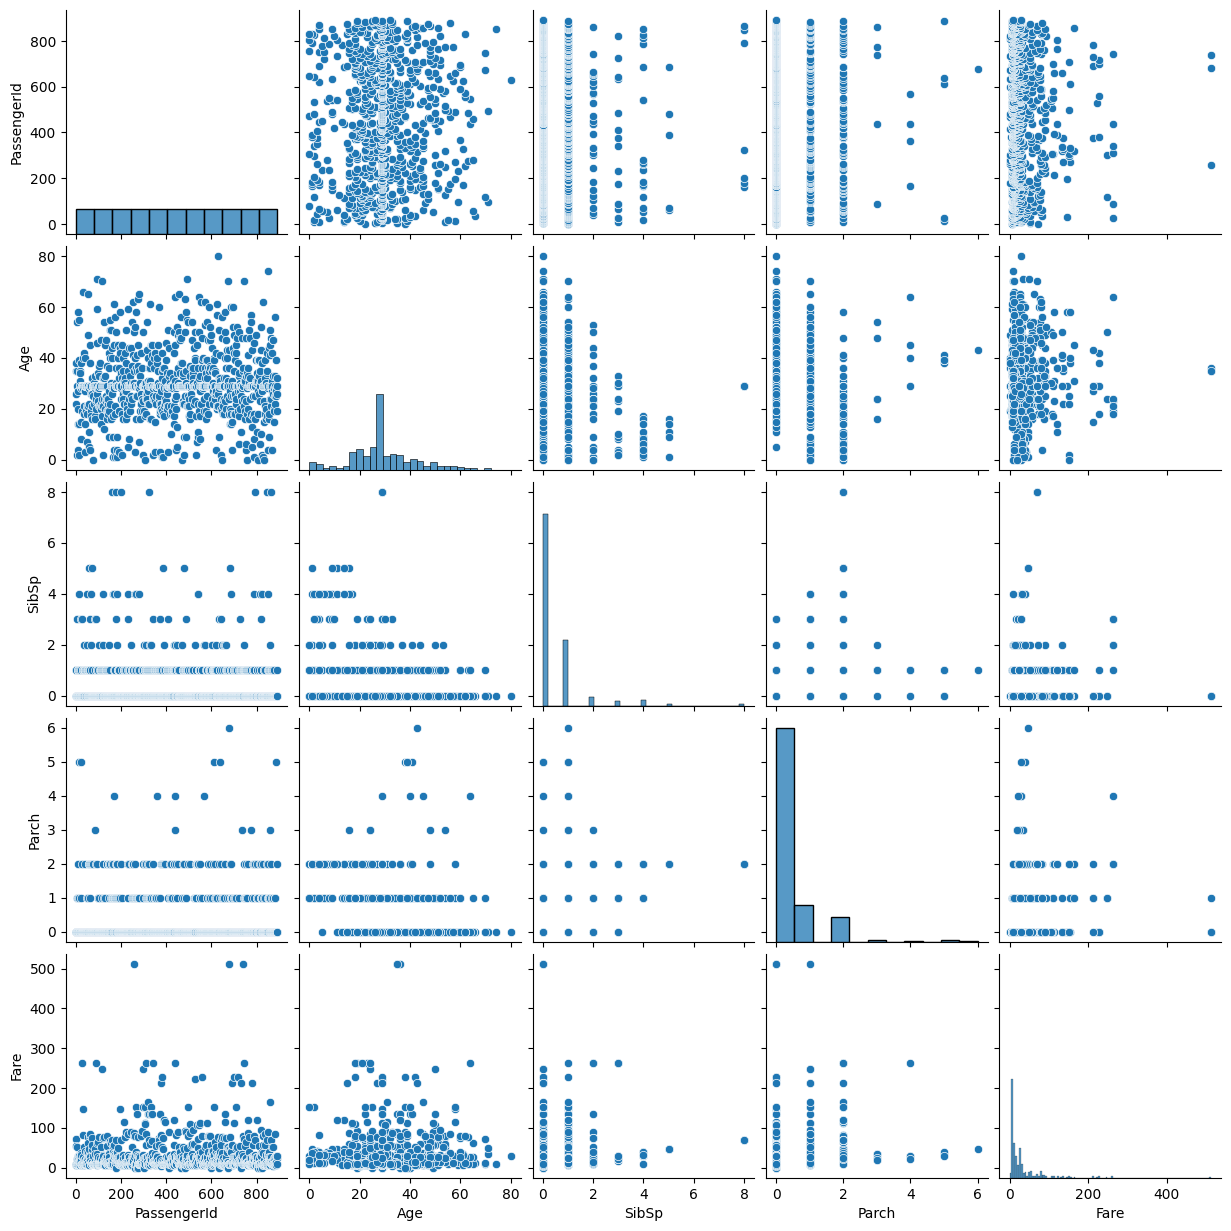

In [28]:
sns.pairplot(titanic);

### Survived

In [103]:
titanic['Survived'].value_counts()

No Survived    549
Survived       342
Name: Survived, dtype: int64

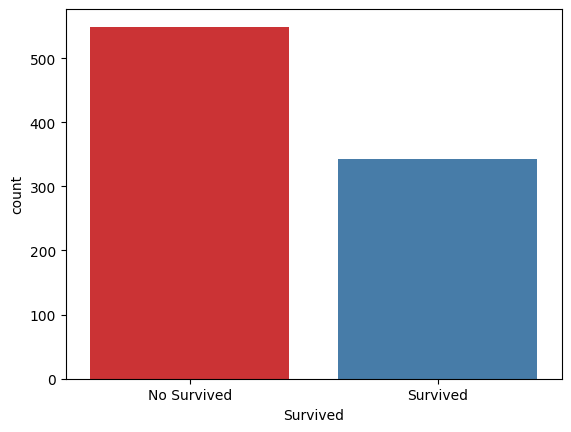

In [29]:
sns.countplot(x="Survived", data=titanic, palette='Set1');

# 549 personas fallecieron y 342 lograron sobrevivir
# 549 people died and 342 managed to survive

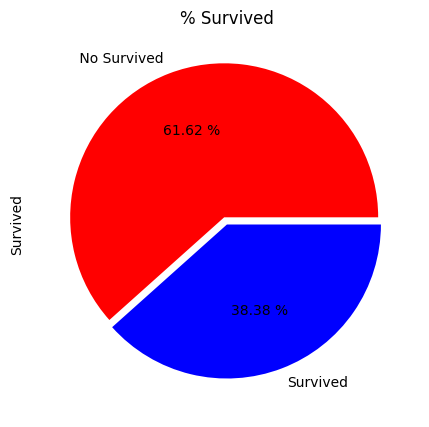

In [30]:
count_survived = titanic['Survived'].value_counts()
count_survived.plot.pie(labels = [' No Survived','Survived'], figsize = (5,5), autopct = '%0.2f %%', explode = (0.05,0), title = '% Survived',colors = 'r''b');

# 61.62% de personas fallecieron y el 38,38% lograron sobrevivir
# 61.62% of people died and 38.38% managed to survive

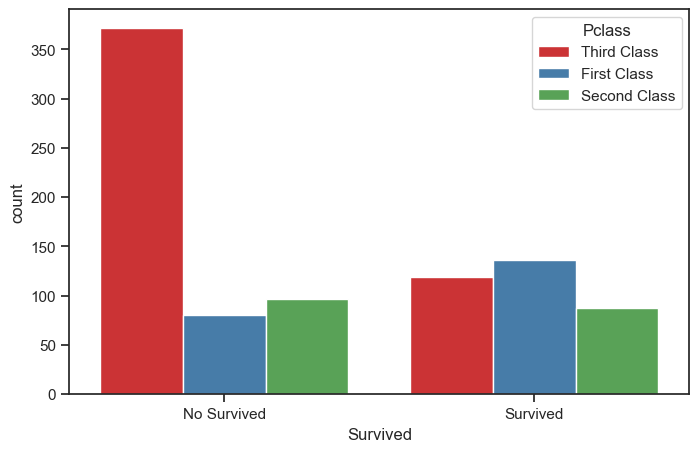

In [31]:
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Survived, hue=titanic.Pclass, palette='Set1');

# Observando el grafico se puede apreciar, que la mayoria de las personas que perdieron la vida pertenecían a la clase 3.
# Observing the graph it can be seen that most of the people who lost their lives belonged to third class.

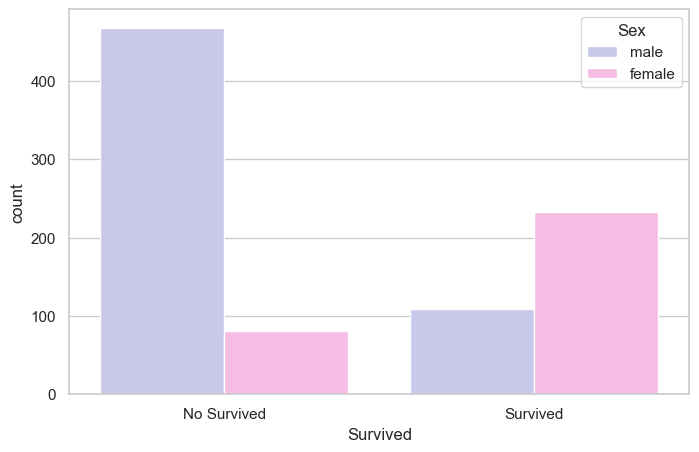

In [32]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Sex, palette= ['#c2c2f0','#ffb3e6']);

# La mayoría de los que murieron eran hombres
# Majority who died were males

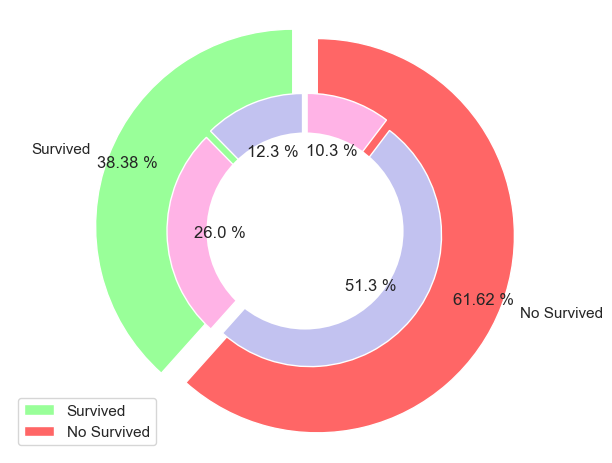

In [33]:
# Data to plot
labels = ['Survived', 'No Survived']
sizes = [342, 549]
labels_gender = ['male','female','male','female']
sizes_gender = [110,232,457,92]
colors = ['#99ff99', '#ff6666']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3, autopct = '%0.2f %%',pctdistance =0.9)
plt.pie(sizes_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=2,autopct = '%0.1f %%',pctdistance =0.6)
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

In [34]:
#dinero /edad/clase

px.scatter(titanic, x='Pclass', y='Age',color='Fare', size='Age',title='Population that lives alone', color_continuous_midpoint=50 ,color_continuous_scale= px.colors.sequential.Rainbow,
hover_data=['Fare', 'Pclass']).show()

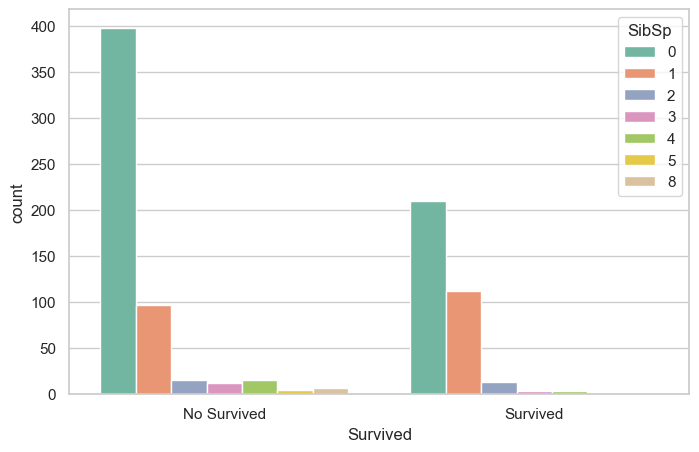

In [35]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.SibSp, palette='Set2');

# La mayoría de los pasajeros no tienen hermanos/cónyuge presentes presentes en el Titanic
# Most passengers do not have siblings/spouses present on the Titanic

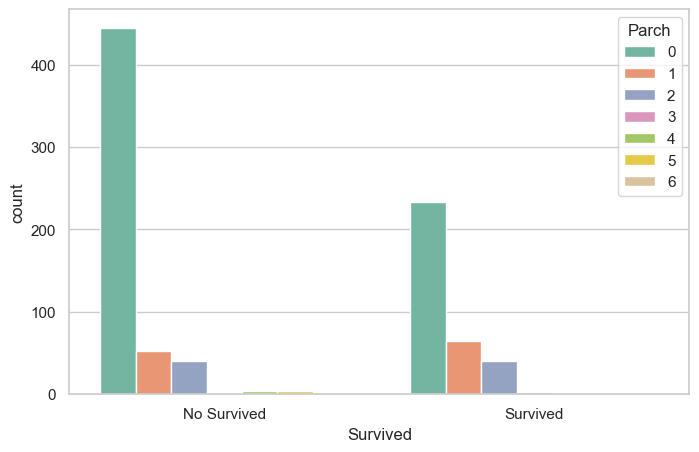

In [36]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Parch, palette='Set2');

# La mayoría de los pasajeros no tienen padres/hijos presentes presentes en el Titanic
# Most passengers do not have Parents/Children present on the Titanic

C:\Users\nacho\AppData\Local\Temp\ipykernel_16492\3584164679.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



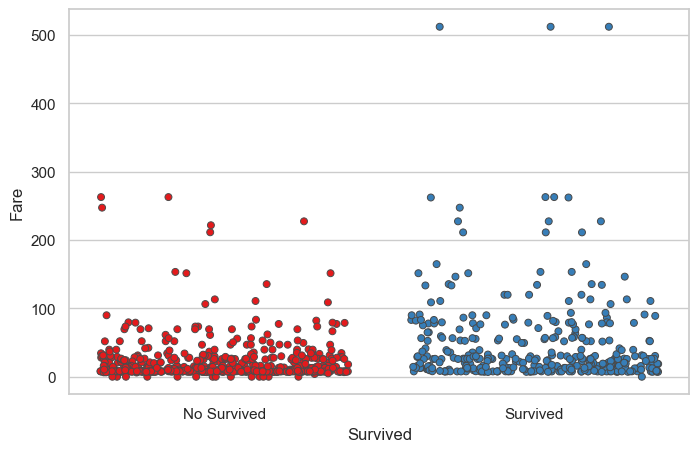

In [37]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.stripplot(x=titanic.Survived, y = titanic.Fare, palette='Set1',linewidth=0.7, jitter=0.4);

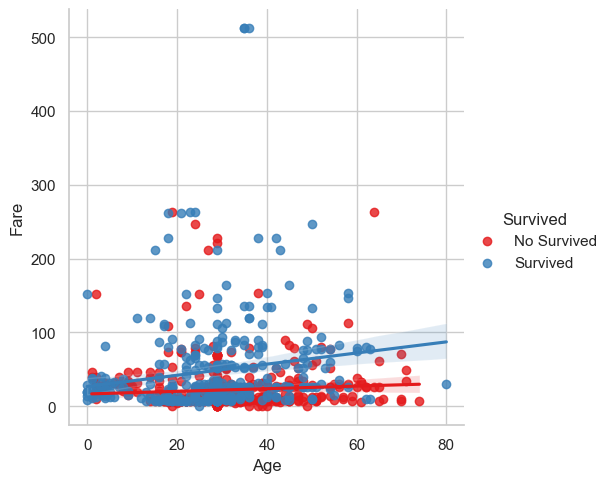

In [38]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=titanic, palette="Set1")
plt.show()


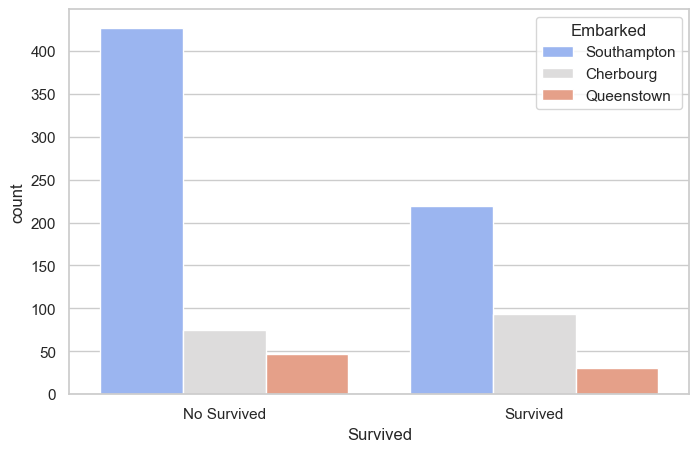

In [88]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Embarked, palette='coolwarm');

### Pclass

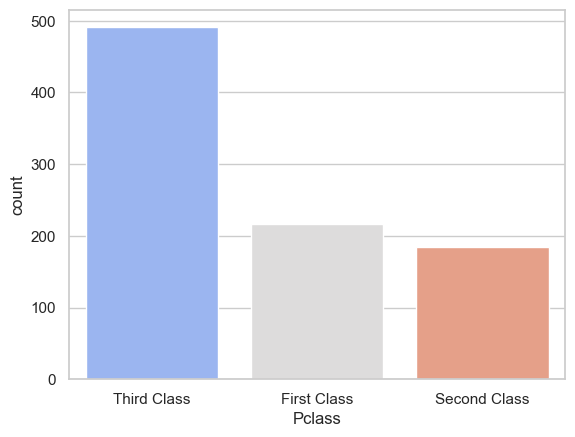

In [42]:
sns.countplot(x="Pclass", data=titanic, palette='coolwarm');

#The graph shows that most of the passengers belong to the third class. Where 491 are Third class, 184 Second class and 216 First class.

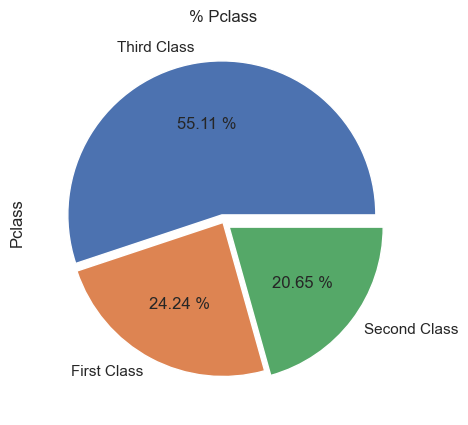

In [43]:
count_class = titanic['Pclass'].value_counts()
count_class.plot.pie(labels = ['Third Class','First Class', 'Second Class'], figsize = (8,5), autopct = '%0.2f %%', explode = (0.05,0,0.05), title = '% Pclass');

# La mayoría de los pasajeros son de de tercera clase
# Most of the passengers are third class

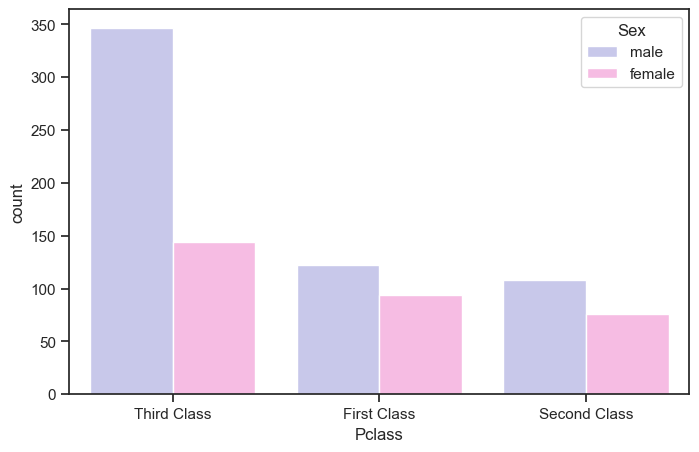

In [85]:
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Pclass, hue=titanic.Sex, palette= ['#c2c2f0','#ffb3e6'] );

# La mayoría de las personas de tercera clase son hombres
# Most third class people are male

C:\Users\nacho\AppData\Local\Temp\ipykernel_11868\1742502040.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



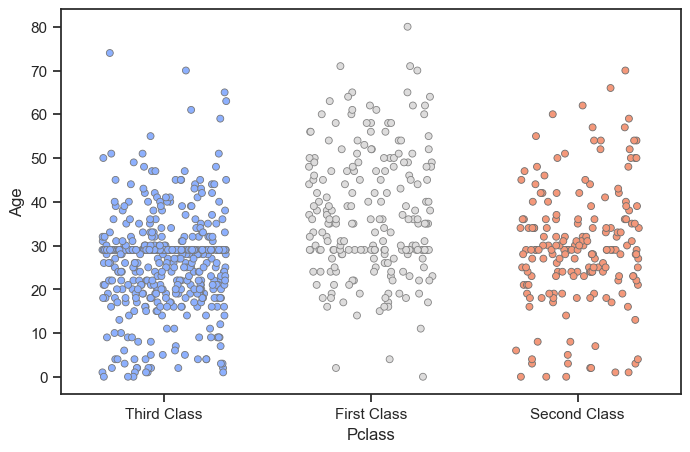

In [132]:
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
sns.stripplot(x=titanic.Pclass, y=titanic.Age, palette='coolwarm', linewidth=0.6, jitter= 0.3);

#In the third class, there is a large amount of data on the working ages of many people who immigrated to America. 
# In first class this reasoning is not fulfilled since rich people travel in this class, causing the ages to be concentrated above 30 years.

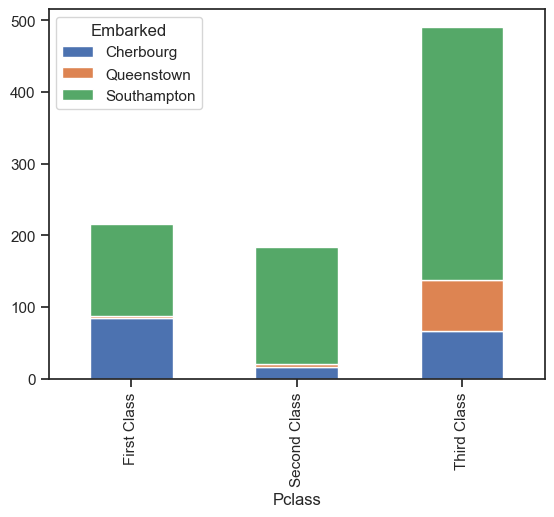

In [92]:
agr = titanic.groupby(['Pclass', 'Embarked']).size().reset_index().pivot(columns='Embarked', index='Pclass', values=0)
agr.plot(kind='bar', stacked=True );

#The graph indicates that the vast majority of passengers who boarded in Southampton regardless of class.

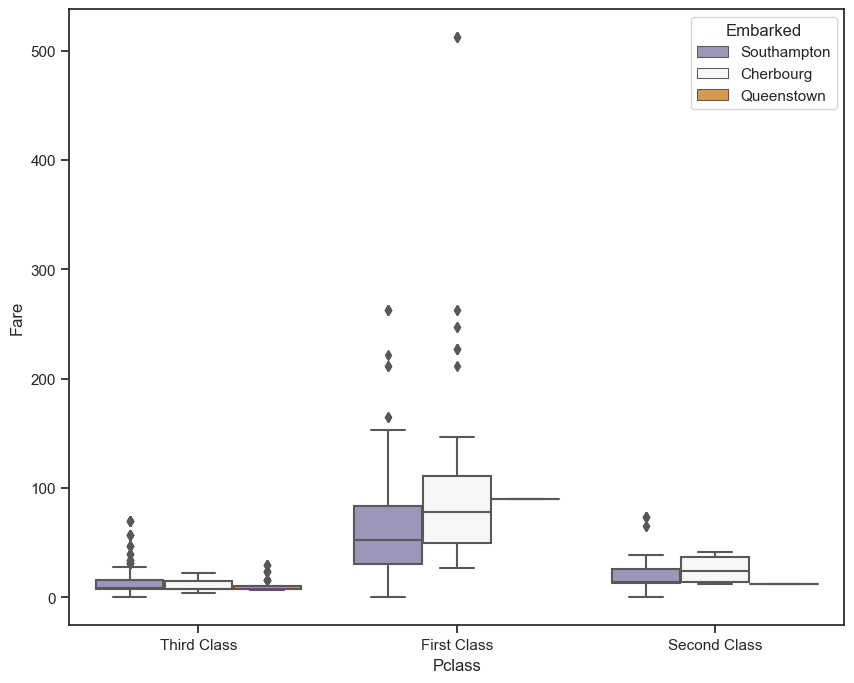

In [122]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.boxplot(x=titanic.Pclass, y = titanic.Fare,  palette='PuOr_r', hue = titanic.Embarked );

# At first glance it can be seen that the first class is where these rich people are and the third class is poor people. 
# The most expensive fares in each class come from Cherbourg and Southampton. Queenstown has the cheapest fares.

### Name

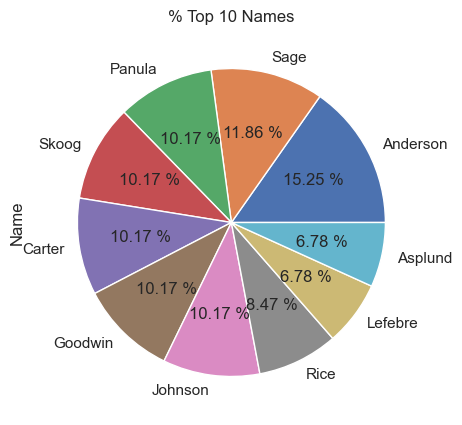

In [97]:
popular_name= titanic.Name.map(lambda x : x.split(',')[0]).value_counts()[:10]
popular_name.plot.pie(labels = ['Anderson','Sage', 'Panula','Skoog', 'Carter', 'Goodwin', 'Johnson', 'Rice', 'Lefebre', 'Asplund'], figsize = (5,5), autopct = '%0.2f %%', explode = (0,0,0,0,0,0,0,0,0,0), title = '% Top 10 Names');

#We can see the most popular passenger names and the percentage they represent.

### Sex

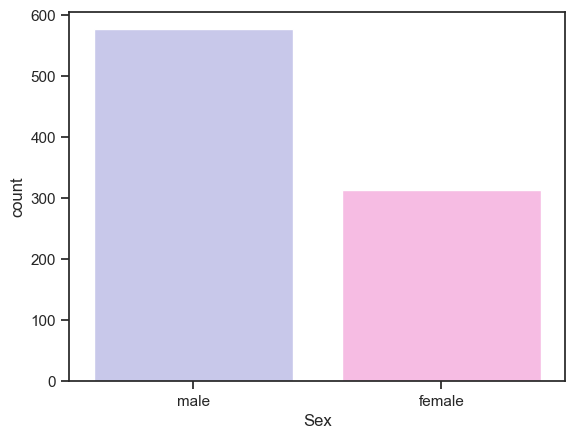

In [105]:
sns.countplot(x="Sex", data=titanic, palette= ['#c2c2f0','#ffb3e6']);

# La mayoría de los passageros son hombres
# Most passengers are male

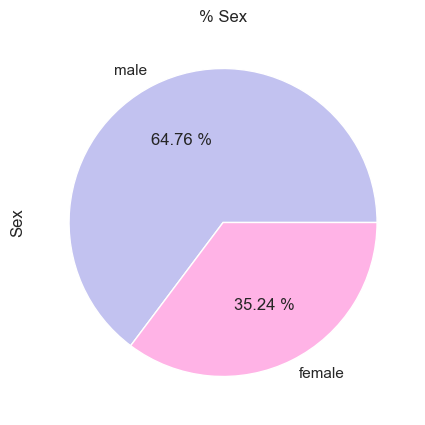

In [56]:
count_sex = titanic['Sex'].value_counts()
colors_sex= ['#c2c2f0','#ffb3e6']
count_sex.plot.pie(labels = ['male', 'female'], figsize = (8,5), autopct = '%0.2f %%', title = '% Sex',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors= colors_sex);

#Most of the passengers are male. There are 64.73% male.

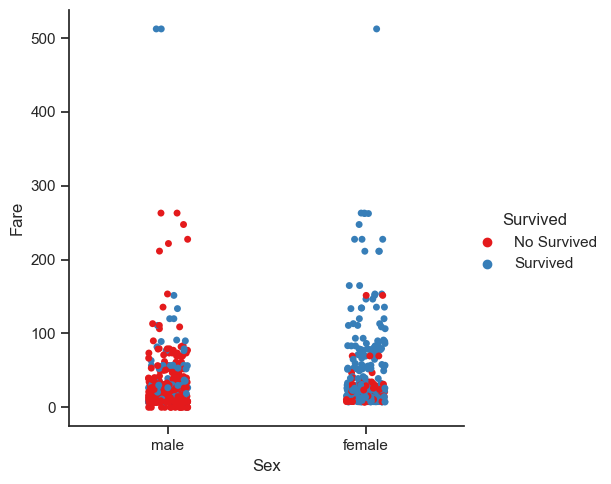

In [108]:
sns.catplot(x="Sex", y="Fare", hue="Survived", data=titanic, palette="Set1");

#The graph shows that men have the highest mortality rate compared to women. In addition, passenger mortality decreases when the rate is higher.

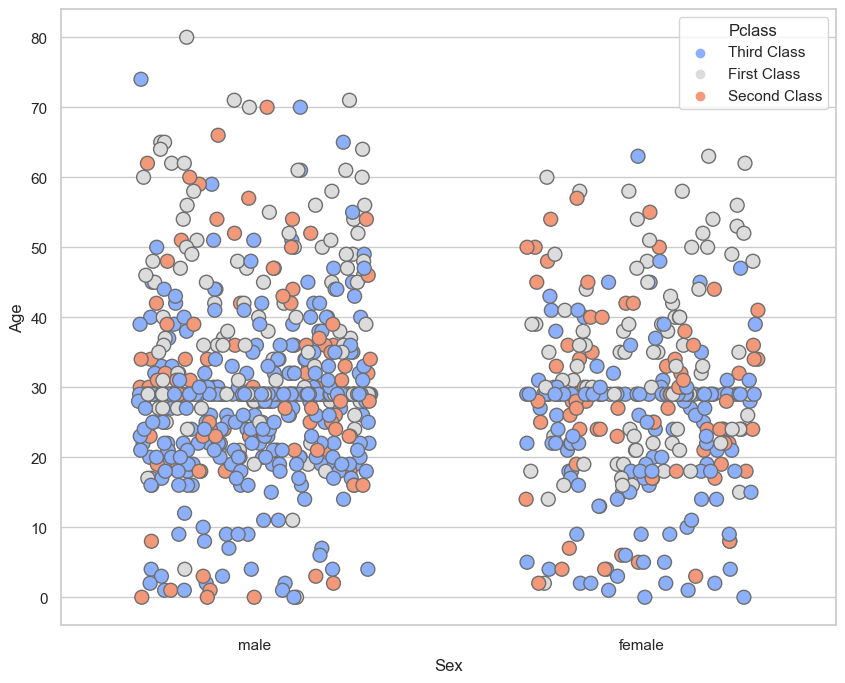

In [131]:
plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')
sns.stripplot(y=titanic.Age, x = titanic.Sex, hue = titanic.Pclass, palette='coolwarm',jitter=0.3, linewidth=1,size=10);

#It seems that there is a higher concentration of data on men. There is a concentration of data between the ages considered working, especially in lower-class men. 
# In the first class, their data is concentrated from the age of 30 and above all on men.

### Age

C:\Users\nacho\AppData\Local\Temp\ipykernel_11868\2653435245.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




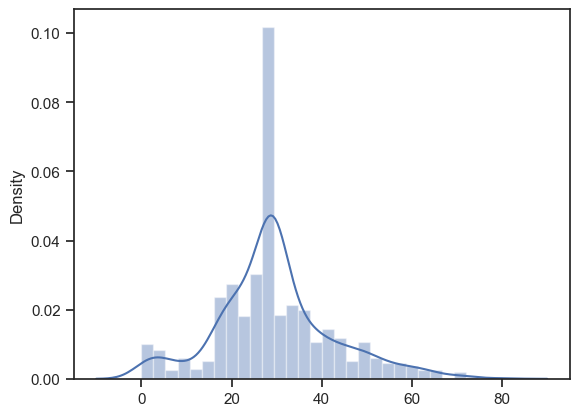

In [134]:
sns.distplot(x = titanic.Age);

# It seems that the greatest concentration of passenger ages is between 15 and 35 years. 
# These are suitable ages for professional development and the search for a new life in America. 
# It should also be mentioned that there is a large concentration of very young passengers.

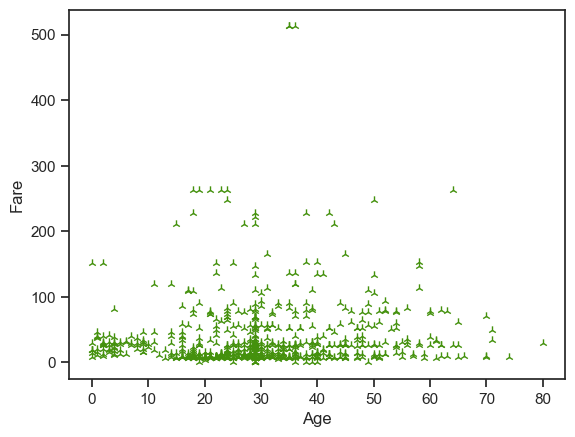

In [82]:
plt.scatter(titanic["Age"], titanic["Fare"], color="#44910d", marker='2', linewidth=1)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# This graph shows that more than half of the passengers have a very low fare and that their ages are between 15 and 35 years.

C:\Users\nacho\AppData\Local\Temp\ipykernel_16492\1973580694.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



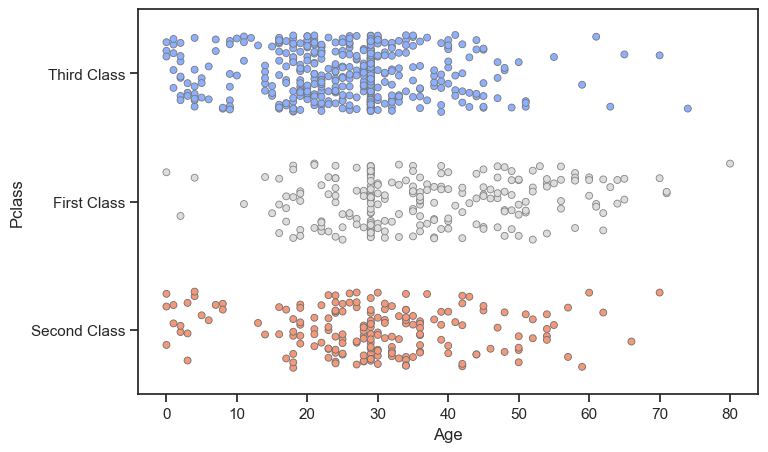

In [58]:
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
sns.stripplot(x=titanic.Age, y=titanic.Pclass, palette='coolwarm', linewidth=0.6, jitter= 0.3);

#In the third class, there is a large amount of data on the working ages of many people who immigrated to America. 
# In first class this reasoning is not fulfilled since rich people travel in this class, causing the ages to be concentrated above 30 years.

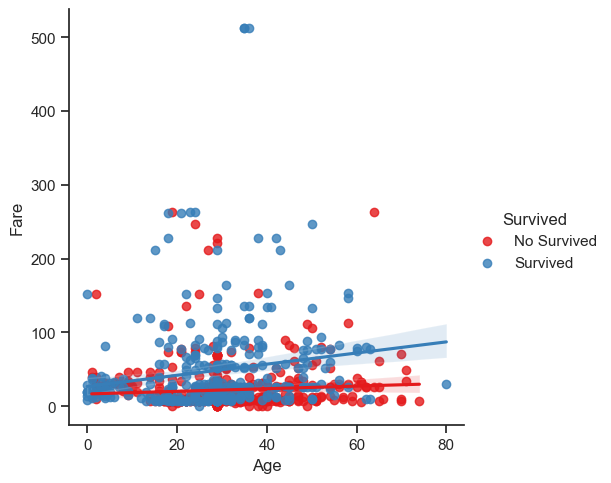

In [153]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=titanic, palette="Set1")
plt.show()

# It can be seen in the graph that the possibility of survival is related to the price of the fare. 
# The better class you have and the more expensive the fare, the more chances of surviving.

### SibSp

In [ ]:
# The SibSp column is defined as the number of siblings/spouses present of the person under consideration.

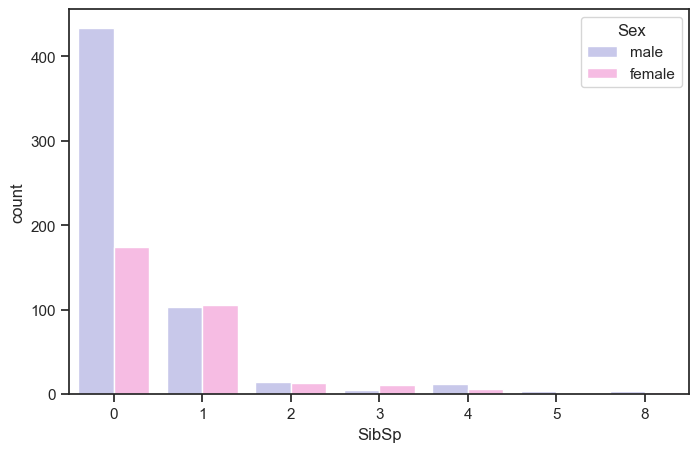

In [146]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.SibSp, hue=titanic.Sex, palette=['#c2c2f0','#ffb3e6']);

# Relationship between number of siblings/spouses and sex.

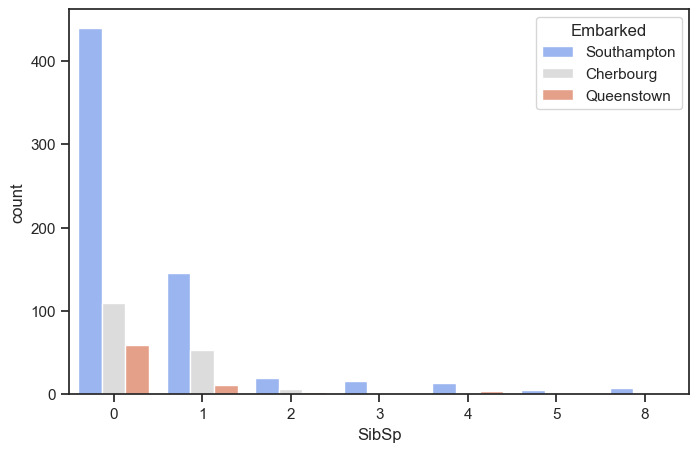

In [151]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.SibSp, hue=titanic.Embarked, palette='coolwarm');

# Relationship between number of siblings/spouses and embarked

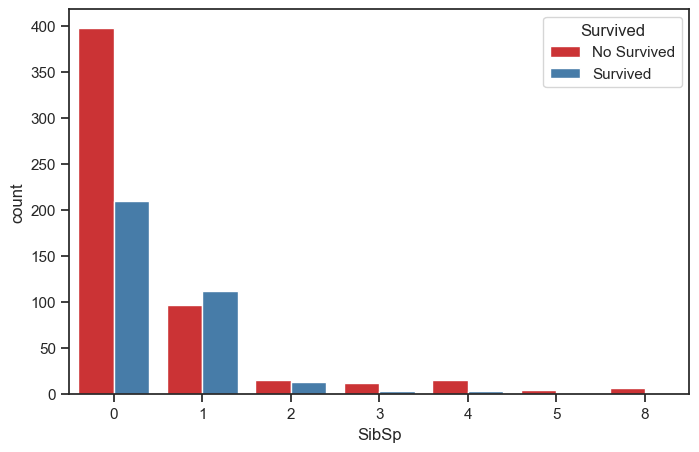

In [152]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.SibSp, hue=titanic.Survived, palette='Set1');

#Relationship between number of siblings/spouses and survival.

2023-01-10 15:15:15.449 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\nacho\AppData\Local\Temp\ipykernel_16492\2373243271.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

2023-01-10 15:15:15.466 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


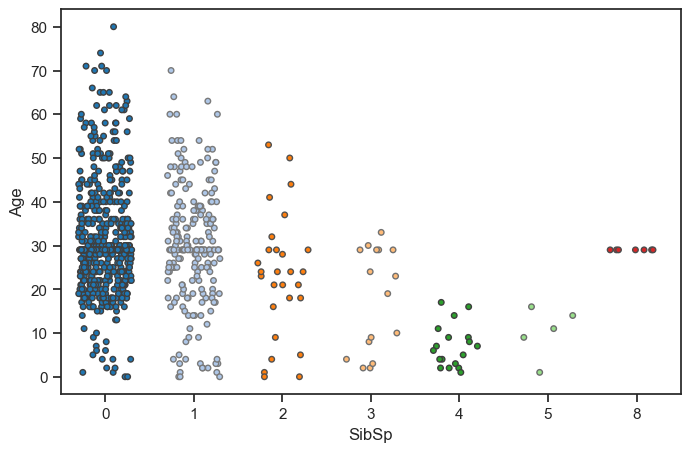

In [86]:
plt.figure(figsize=(8,5))
sns.stripplot(x=titanic.SibSp, y = titanic.Age ,  palette='tab20', size = 4, linewidth=1,jitter=0.3);

# Relationship between number of siblings/spouses and age.

2023-01-10 15:15:05.869 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\nacho\AppData\Local\Temp\ipykernel_16492\634126179.py:2: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

2023-01-10 15:15:05.884 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


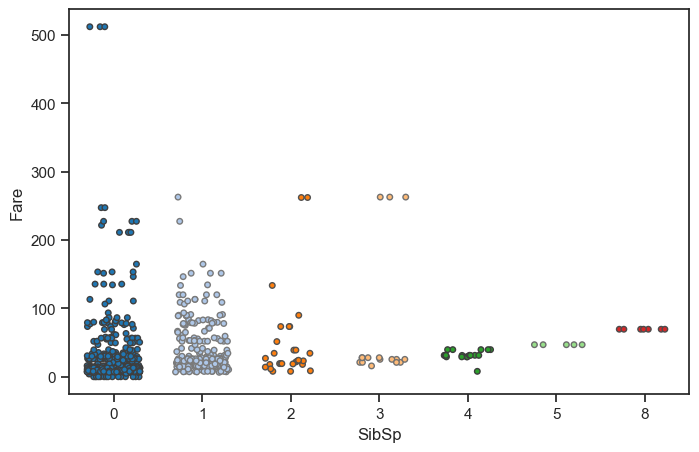

In [85]:
plt.figure(figsize=(8,5))
sns.stripplot(x=titanic.SibSp, y = titanic.Fare ,  palette='tab20', size = 4, linewidth=1,jitter=0.3);

# Relationship between number of siblings/spouses and fare

### Parch

In [ ]:
# The Parch column is defined as the number of parents/children present of the person under consideration.

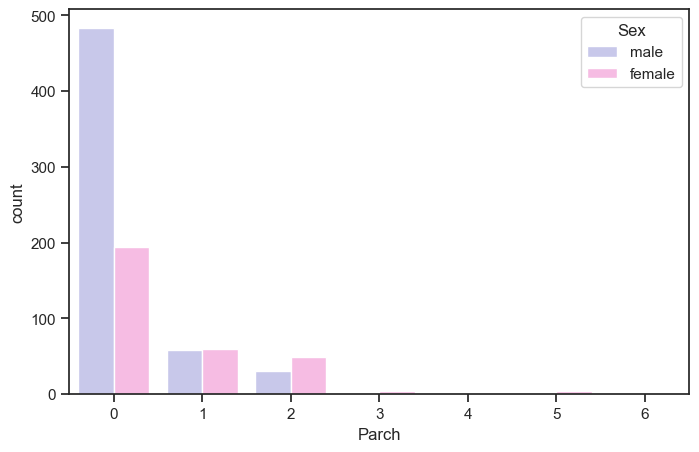

In [154]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.Parch, hue=titanic.Sex, palette=['#c2c2f0','#ffb3e6']);

# Relationship between number of parents/children and sex.

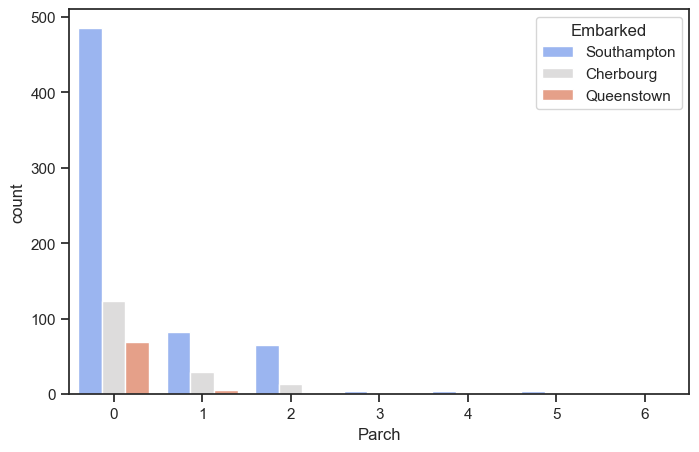

In [155]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.Parch, hue=titanic.Embarked, palette='coolwarm');

# Relationship between number of parents/children and embarked.

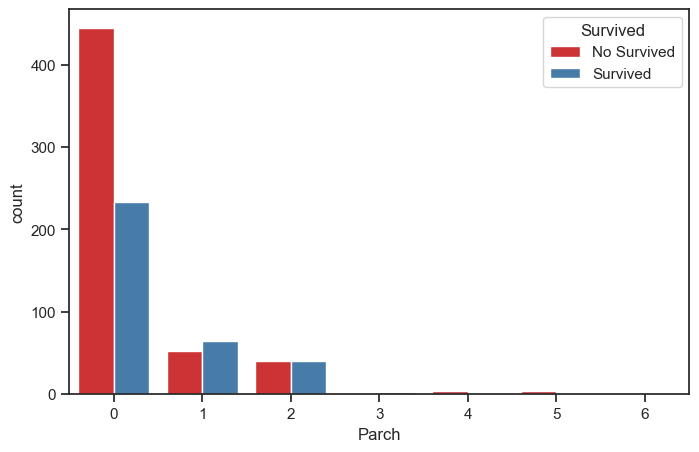

In [156]:
plt.figure(figsize=(8,5))
sns.countplot(x=titanic.Parch, hue=titanic.Survived, palette='Set1');

#Relationship between number of parents/children and survival.

### Ticket

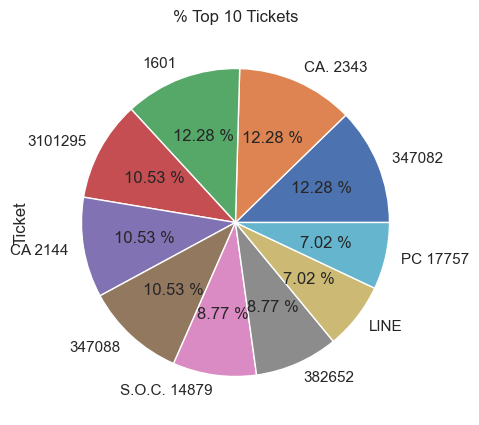

In [160]:
popular_ticket= titanic.Ticket.map(lambda x : x.split(',')[0]).value_counts()[:10]
popular_ticket.plot.pie(labels = ['347082 ','CA. 2343', '1601','3101295', 'CA 2144', '347088', 'S.O.C. 14879', '382652', 'LINE', 'PC 17757'], figsize = (5,5), autopct = '%0.2f %%', explode = (0,0,0,0,0,0,0,0,0,0), title = '% Top 10 Tickets');

# We can see the most popular passenger tickets and the percentage they represent.

### Fare

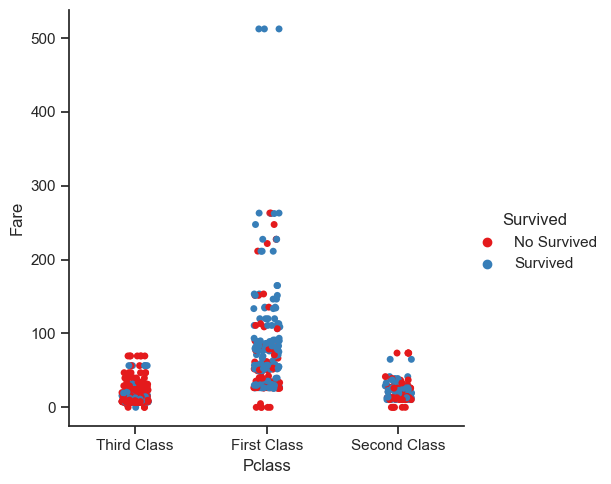

In [162]:
sns.catplot(x="Pclass", y="Fare", hue="Survived", data=titanic, palette="Set1");



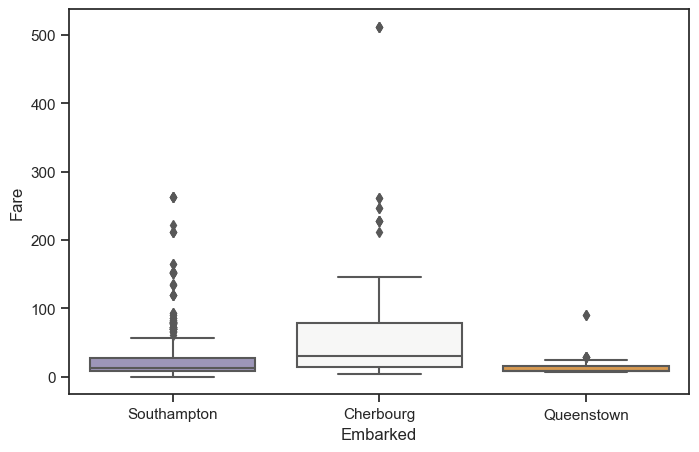

In [166]:
plt.figure(figsize=(8,5))
sns.boxplot(x=titanic.Embarked, y = titanic.Fare, palette='PuOr_r');

C:\Users\nacho\AppData\Local\Temp\ipykernel_11868\3584164679.py:3: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



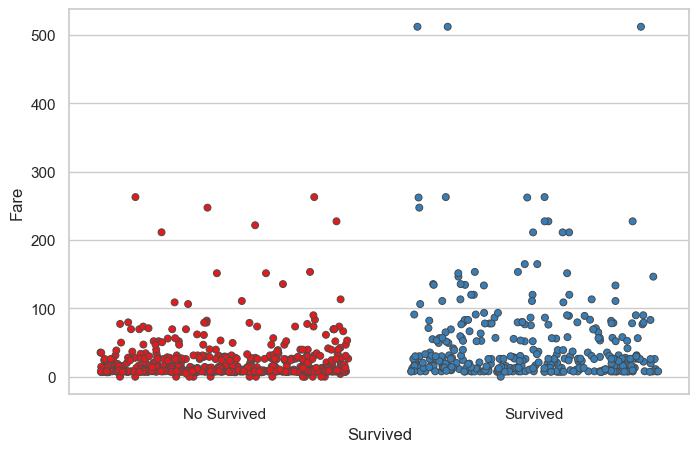

In [167]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.stripplot(x=titanic.Survived, y = titanic.Fare, palette='Set1',linewidth=0.7, jitter=0.4);

#Relationship between number of parents/children and survival.

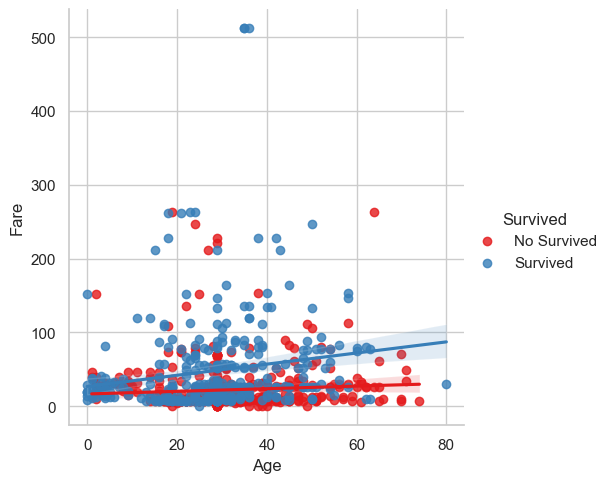

In [168]:
sns.lmplot(x="Age", y="Fare", hue="Survived", data=titanic, palette="Set1")
plt.show()

#It can be seen in the graph that the possibility of survival is related to the price of the fare. 
# The better class you have and the more expensive the fare, the more chances of surviving.

### Embarked

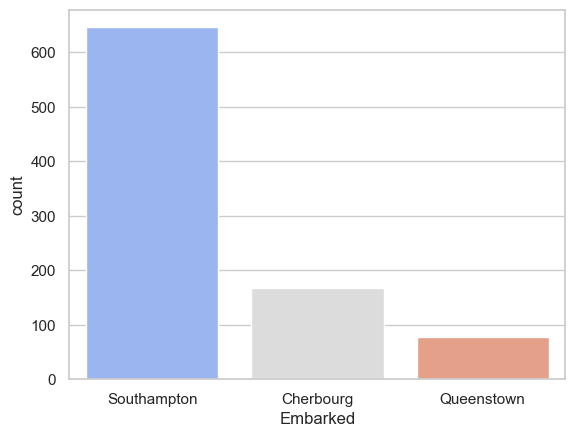

In [170]:
sns.countplot(x="Embarked", data=titanic, palette='coolwarm');

#The graph shows that the majority of passengers boarded at Southampton. 
# Where 646 in Southampton, 168 in Cherbourg and 77 in Queenstown.

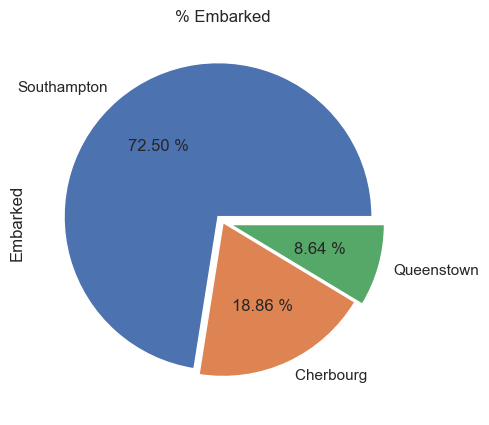

In [173]:
count_embarked = titanic['Embarked'].value_counts()
count_embarked.plot.pie(labels = ['Southampton','Cherbourg ', 'Queenstown'], figsize = (5,5), autopct = '%0.2f %%', explode = (0.05,0,0.05), title = '% Embarked');

# La mayoría de los pasajeros son de de Southampton
# Most of the passengers are from Southampton

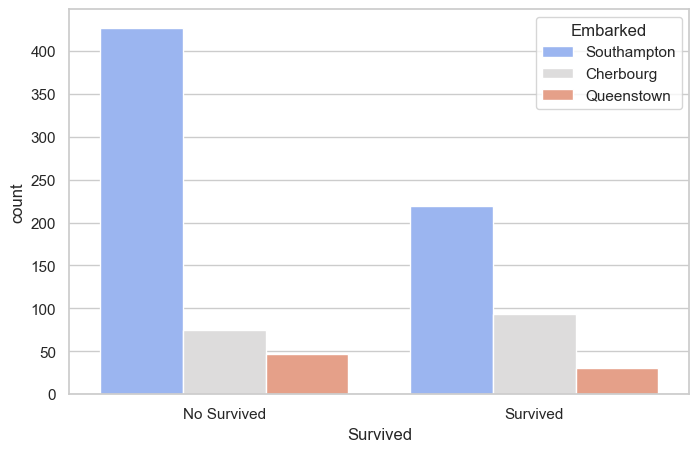

In [89]:
plt.figure(figsize=(8,5))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Embarked, palette='coolwarm');

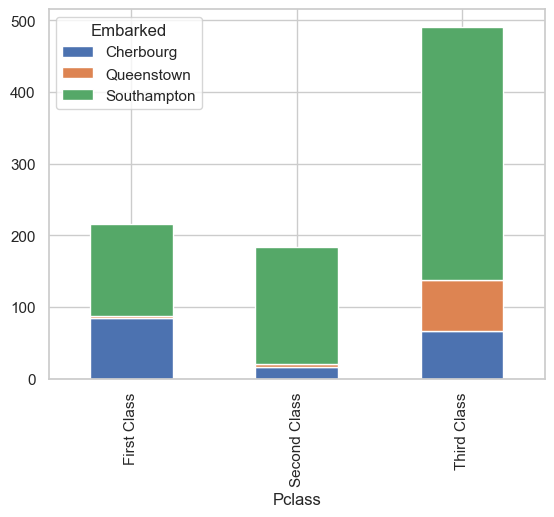

In [90]:
agr = titanic.groupby(['Pclass', 'Embarked']).size().reset_index().pivot(columns='Embarked', index='Pclass', values=0)
agr.plot(kind='bar', stacked=True );

#The graph indicates that the vast majority of passengers who boarded in Southampton regardless of class.

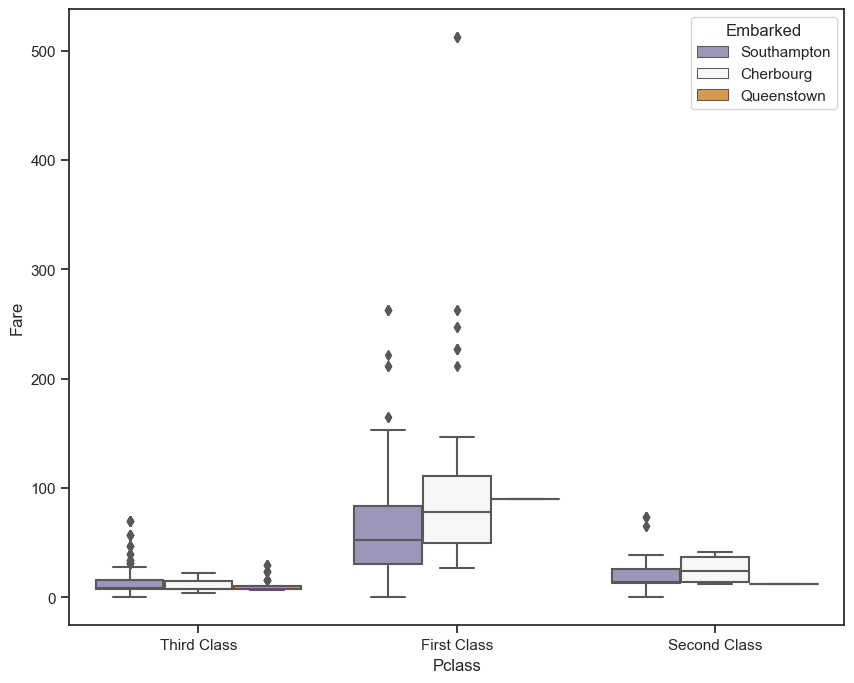

In [91]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.boxplot(x=titanic.Pclass, y = titanic.Fare,  palette='PuOr_r', hue = titanic.Embarked );

# At first glance it can be seen that the first class is where these rich people are and the third class is poor people. 
# The most expensive fares in each class come from Cherbourg and Southampton. Queenstown has the cheapest fares.

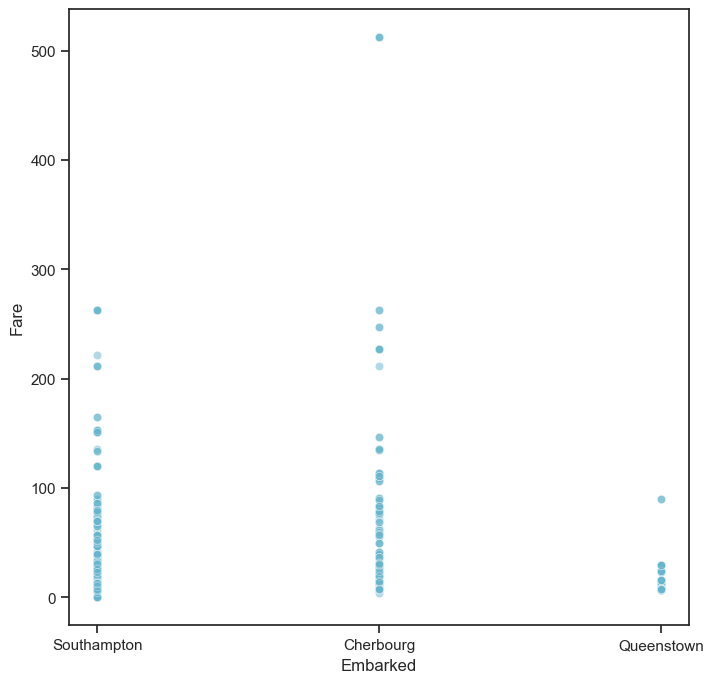

In [102]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=titanic.Embarked, y = titanic.Fare,color='c', alpha=0.5, edgecolors='r', linewidths=2);